In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [27]:
path = "checkpoints_simple/"
conf_mat_path = os.path.join(path,"last_test_confmat.csv")
metrics_path = os.path.join(path,"last_test_metrics.csv")

In [32]:
confmat = pd.read_csv(conf_mat_path, index_col=0)
confmat = confmat.astype("int32")
metrics = pd.read_csv(metrics_path, index_col=0)
metrics = metrics.transpose()

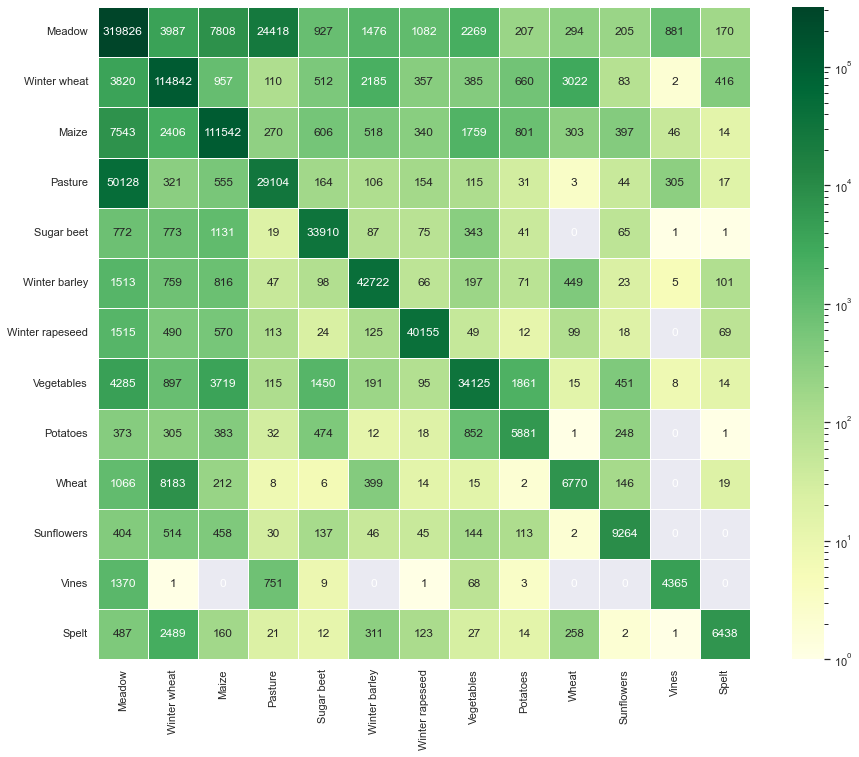

In [40]:
from matplotlib.colors import LogNorm
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.heatmap(confmat, annot=True, fmt="d", linewidths=.5, square=True, norm=LogNorm(), cmap="YlGn")
plt.savefig(os.path.join(path, "confmat.png"), bbox_inches="tight")
plt.show()

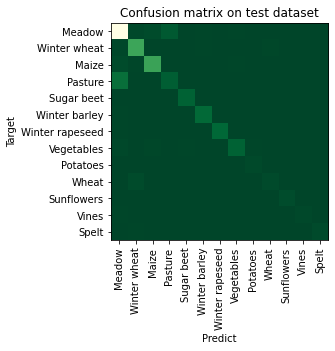

In [29]:
# Draw confusion matrix
plt.imshow(confmat.to_numpy(), cmap="YlGn_r")
plt.xticks(np.arange(13), confmat.columns, rotation=90)
plt.yticks(np.arange(13), confmat.columns)
plt.title("Confusion matrix on test dataset")
plt.xlabel("Predict")
plt.ylabel("Target")
plt.savefig(os.path.join(path, "confmat.png"), bbox_inches="tight")
plt.show()

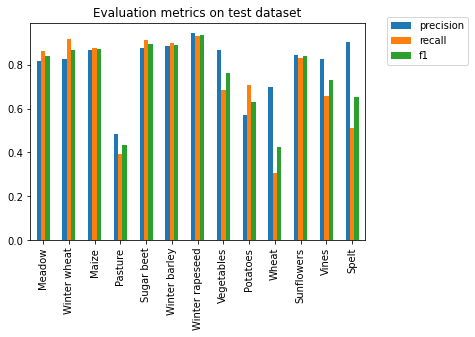

In [25]:
# Draw matrix
ax = metrics.plot(kind="bar")
ax.legend(bbox_to_anchor=(1.05,1.05))
plt.title("Evaluation metrics on test dataset")
plt.savefig(os.path.join(path, "metrics.png"), bbox_inches="tight")
plt.show()

In [26]:
# Calculate overall acc
confmat_arr = confmat.to_numpy()
overall_acc = np.trace(confmat_arr)/np.sum(confmat_arr)
print("Overall acc, ", overall_acc)

Overall acc,  0.8117364664539017


In [19]:
confmat.style.background_gradient(cmap='Blues')

,Meadow,Winter wheat,Maize,Pasture,Sugar beet,Winter barley,Winter rapeseed,Vegetables,Potatoes,Wheat,Sunflowers,Vines,Spelt
Meadow,314437.000000,4057.000000,8294.000000,30070.000000,1146.000000,1392.000000,1085.000000,1662.000000,178.000000,453.000000,244.000000,349.000000,183.000000
Winter wheat,3782.000000,115038.000000,904.000000,201.000000,478.000000,2203.000000,379.000000,361.000000,603.000000,2897.000000,102.000000,0.000000,403.000000
Maize,7718.000000,2689.000000,110942.000000,635.000000,729.000000,561.000000,340.000000,1518.000000,612.000000,199.000000,567.000000,6.000000,29.000000
Pasture,47127.000000,291.000000,546.000000,32078.000000,116.000000,105.000000,250.000000,101.000000,23.000000,17.000000,79.000000,289.000000,25.000000
Sugar beet,780.000000,778.000000,1281.000000,42.000000,33730.000000,94.000000,91.000000,149.000000,173.000000,4.000000,89.000000,7.000000,0.000000
Winter barley,1724.000000,939.000000,782.000000,104.000000,66.000000,41968.000000,90.000000,210.000000,62.000000,828.000000,74.000000,0.000000,20.000000
Winter rapeseed,1393.000000,544.000000,592.000000,207.000000,30.000000,114.000000,40106.000000,61.000000,22.000000,125.000000,17.000000,0.000000,28.000000
Vegetables,5432.000000,1137.000000,4346.000000,398.000000,1434.000000,171.000000,102.000000,31185.000000,2421.000000,25.000000,528.000000,13.000000,34.000000
Potatoes,309.000000,307.000000,456.000000,75.000000,488.000000,20.000000,29.000000,799.000000,5805.000000,4.000000,286.000000,1.000000,1.000000
Wheat,979.000000,8571.000000,197.000000,29.000000,7.000000,434.000000,45.000000,26.000000,3.000000,6370.000000,145.000000,0.000000,34.000000


In [20]:
print("Target")
np.sum(confmat_arr, axis=0)

Target


array([385972., 138562., 128989.,  64810.,  38363.,  47408.,  42745.,
        36296.,  10077.,  11112.,  11369.,   4771.,   6057.])

In [21]:
print("Predict")
np.sum(confmat_arr, axis=1)

Predict


array([363550., 127351., 126545.,  81047.,  37218.,  46867.,  43239.,
        47226.,   8580.,  16840.,  11157.,   6568.,  10343.])